In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [93]:
vida = pd.read_csv('vida.csv')

In [94]:
vida2 = vida.dropna(how='any')

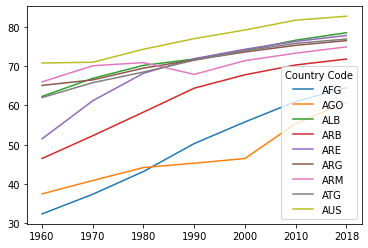

In [95]:
plt = vida2.drop(['Country Name'], axis=1)
plt = plt.set_index('Country Code').transpose()
plt.iloc[:,1:10].plot()

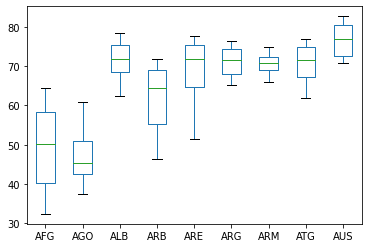

In [79]:
plt = vida2.drop(['Country Name'], axis=1)
plt = plt.set_index('Country Code').transpose()
plt.iloc[:,1:10].plot(kind='box')

# Créditos

In [47]:
credit = pd.read_csv('CasoCreditos.csv')

In [10]:
credit.head()

,loan_id,status,due_date,paid_date,loan_amount,risk_score,gender,age,dependants,device,urban_city,loan_usage
0,bb08b55c1f,loan,2018-06-02,NaN,1900,0.133,Mujer,33,0,android,rural,Otros
1,f23fd22961,paid,2018-06-01,2018-05-29,2400,0.941,Mujer,41,2,ios,urbano,Educacion
2,b723773be8,paid,2018-06-01,2018-05-21,1900,0.945,Mujer,45,0,ios,urbano,Educacion
3,726c7712e0,paid,2018-06-01,2018-04-02,2000,0.905,Mujer,18,0,ios,rural,Educacion
4,8151753f45,paid,2018-06-01,2018-05-29,1600,0.908,Hombre,18,0,ios,urbano,Educacion


In [11]:
credit.corr()

,loan_amount,risk_score,age,dependants
loan_amount,1.000000,0.016775,0.013699,0.004704
risk_score,0.016775,1.000000,0.061914,0.017301
age,0.013699,0.061914,1.000000,-0.006916
dependants,0.004704,0.017301,-0.006916,1.000000


In [12]:
data = credit.copy()
data.head()

,loan_id,status,due_date,paid_date,loan_amount,risk_score,gender,age,dependants,device,urban_city,loan_usage
0,bb08b55c1f,loan,2018-06-02,NaN,1900,0.133,Mujer,33,0,android,rural,Otros
1,f23fd22961,paid,2018-06-01,2018-05-29,2400,0.941,Mujer,41,2,ios,urbano,Educacion
2,b723773be8,paid,2018-06-01,2018-05-21,1900,0.945,Mujer,45,0,ios,urbano,Educacion
3,726c7712e0,paid,2018-06-01,2018-04-02,2000,0.905,Mujer,18,0,ios,rural,Educacion
4,8151753f45,paid,2018-06-01,2018-05-29,1600,0.908,Hombre,18,0,ios,urbano,Educacion


In [24]:
data = credit.copy()
data.loc[data['device'] == 'android', 'device']  = 1
data.loc[data['device'] == 'ios', 'device']      = 0
data['device'] = data['device'].astype('int64')

data.loc[data['urban_city'] == 'rural', 'urban_city' ]  = 1
data.loc[data['urban_city'] == 'urbano', 'urban_city']  = 0
data['urban_city']= data['urban_city'].astype('int64')

data.loc[data['gender'] == 'Mujer', 'gender' ]  = 1
data.loc[data['gender'] == 'Hombre', 'gender']  = 0
data['gender'] = data['gender'].astype('int64')

data.head()

,loan_id,status,due_date,paid_date,loan_amount,risk_score,gender,age,dependants,device,urban_city,loan_usage
0,bb08b55c1f,loan,2018-06-02,NaN,1900,0.133,1,33,0,1,1,Otros
1,f23fd22961,paid,2018-06-01,2018-05-29,2400,0.941,1,41,2,0,0,Educacion
2,b723773be8,paid,2018-06-01,2018-05-21,1900,0.945,1,45,0,0,0,Educacion
3,726c7712e0,paid,2018-06-01,2018-04-02,2000,0.905,1,18,0,0,1,Educacion
4,8151753f45,paid,2018-06-01,2018-05-29,1600,0.908,0,18,0,0,0,Educacion


In [14]:
data.corr()

,loan_amount,risk_score,gender,age,dependants,device,urban_city
loan_amount,1.000000,0.016775,0.003718,0.013699,0.004704,0.002458,-0.007089
risk_score,0.016775,1.000000,-0.004565,0.061914,0.017301,-0.353939,-0.360980
gender,0.003718,-0.004565,1.000000,-0.009588,-0.007185,-0.001797,-0.001503
age,0.013699,0.061914,-0.009588,1.000000,-0.006916,-0.031628,-0.033014
dependants,0.004704,0.017301,-0.007185,-0.006916,1.000000,-0.002294,0.003056
device,0.002458,-0.353939,-0.001797,-0.031628,-0.002294,1.000000,0.125948
urban_city,-0.007089,-0.360980,-0.001503,-0.033014,0.003056,0.125948,1.000000


In [23]:
def dfNorm(df):
    df_norm = (df - df.min()) / (df.max() - df.min())
    return df_norm

In [25]:
data['loan_amount'] = dfNorm(data['loan_amount'])

In [26]:
data['age'] = dfNorm(data['age'])

In [27]:
data['dependants'] = dfNorm(data['dependants'])

In [28]:
data.describe()

,loan_amount,risk_score,gender,age,dependants,device,urban_city
count,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.00000,7924.000000
mean,0.498291,0.853739,0.590232,0.441510,0.294043,0.15106,0.151186
std,0.126032,0.121717,0.491822,0.323883,0.353881,0.35813,0.358253
min,0.000000,0.103000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.416667,0.769000,0.000000,0.131579,0.000000,0.00000,0.000000
50%,0.500000,0.889000,1.000000,0.447368,0.000000,0.00000,0.000000
75%,0.583333,0.954250,1.000000,0.717105,0.666667,0.00000,0.000000
max,1.000000,0.999000,1.000000,1.000000,1.000000,1.00000,1.000000


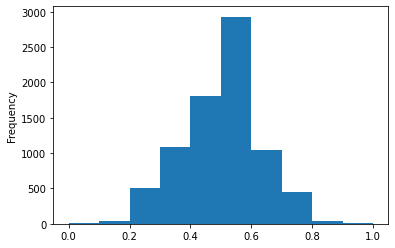

In [29]:
data['loan_amount'].plot(kind = 'hist')

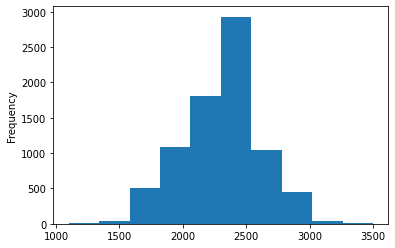

In [22]:
credit['loan_amount'].plot(kind = 'hist')

In [46]:
credit['loan_amount'].plot(kind = 'hist')

TypeError: no numeric data to plot

In [39]:
def dfStd(df):
    df_std = (df - df.mean()) / (df.std())
    return df_std

In [48]:
std = dfStd(credit['loan_amount'])

El z-score también conocido como puntuación estándar, valores z, z-score, resultados normales, y las variables estandarizadas, el uso de "Z" se debe a la distribución normal es también conocida como la "distribución de Z", indica el número de estándar las desviaciones de una observación o dato está por encima o por debajo de la media

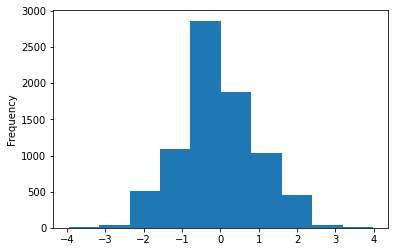

In [50]:
std.plot(kind='hist')

In [91]:
data.corr()

,loan_amount,risk_score,gender,age,dependants,device,urban_city
loan_amount,1.000000,0.016775,0.003718,0.013699,0.004704,0.002458,-0.007089
risk_score,0.016775,1.000000,-0.004565,0.061914,0.017301,-0.353939,-0.360980
gender,0.003718,-0.004565,1.000000,-0.009588,-0.007185,-0.001797,-0.001503
age,0.013699,0.061914,-0.009588,1.000000,-0.006916,-0.031628,-0.033014
dependants,0.004704,0.017301,-0.007185,-0.006916,1.000000,-0.002294,0.003056
device,0.002458,-0.353939,-0.001797,-0.031628,-0.002294,1.000000,0.125948
urban_city,-0.007089,-0.360980,-0.001503,-0.033014,0.003056,0.125948,1.000000


In [ ]:
lambda <arguments> : <Return Value if condition is True> if <condition> else <Return Value if condition is False>

In [72]:
def myFunc(x):
    if x < 1500:
        return 'Bajo'
    elif x>= 1500 and x < 2000 :
        return 'Medio'
    else:
        return 'Alto'

In [75]:
credit['categoria2'] = credit['loan_amount'].apply(myFunc)
credit['categoria2']

0       Medio
1        Alto
2       Medio
3        Alto
4       Medio
        ...  
7919     Alto
7920     Alto
7921    Medio
7922     Alto
7923     Alto
Name: categoria2, Length: 7924, dtype: object

In [73]:
credit['categoria'] = credit['loan_amount'].apply(lambda x: 'Bajo' 
                                                  if x < 1500 
                                                  else ('medio'if (x>= 1500 and  x < 2000 ) 
                                                        else 'Alto' ))
credit.groupby('categoria')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
categoria,,,,,,,,
Alto,6910.0,2369.001447,246.509901,2000.0,2200.0,2300.0,2500.0,3500.0
Bajo,19.0,1310.526316,87.526103,1100.0,1300.0,1300.0,1400.0,1400.0
medio,995.0,1807.035176,108.727567,1500.0,1700.0,1800.0,1900.0,1900.0


In [91]:
credit.groupby(['categoria', 'due_date']).size()

categoria  due_date  
Alto       2018-06-01    3328
           2018-06-02     705
           2018-06-03     167
           2018-06-04    1620
           2018-06-05    1090
Bajo       2018-06-01      12
           2018-06-02       2
           2018-06-04       5
medio      2018-06-01     489
           2018-06-02     109
           2018-06-03      22
           2018-06-04     235
           2018-06-05     140
dtype: int64

# Pivote


In [76]:
credit.head()

,loan_id,status,due_date,paid_date,loan_amount,risk_score,gender,age,dependants,device,urban_city,loan_usage,categoria,categoria2
0,bb08b55c1f,loan,2018-06-02,NaN,1900,0.133,Mujer,33,0,android,rural,Otros,medio,Medio
1,f23fd22961,paid,2018-06-01,2018-05-29,2400,0.941,Mujer,41,2,ios,urbano,Educacion,Alto,Alto
2,b723773be8,paid,2018-06-01,2018-05-21,1900,0.945,Mujer,45,0,ios,urbano,Educacion,medio,Medio
3,726c7712e0,paid,2018-06-01,2018-04-02,2000,0.905,Mujer,18,0,ios,rural,Educacion,Alto,Alto
4,8151753f45,paid,2018-06-01,2018-05-29,1600,0.908,Hombre,18,0,ios,urbano,Educacion,medio,Medio


ValueError: Index contains duplicate entries, cannot reshape

In [11]:
credit.describe()

,loan_amount,risk_score,age,dependants
count,7924.000000,7924.000000,7924.000000,7924.000000
mean,2295.898536,0.853739,34.777385,0.882130
std,302.477611,0.121717,12.307564,1.061643
min,1100.000000,0.103000,18.000000,0.000000
25%,2100.000000,0.769000,23.000000,0.000000
50%,2300.000000,0.889000,35.000000,0.000000
75%,2500.000000,0.954250,45.250000,2.000000
max,3500.000000,0.999000,56.000000,3.000000


In [12]:
credit.head()

,loan_id,status,due_date,paid_date,loan_amount,risk_score,gender,age,dependants,device,urban_city,loan_usage
0,bb08b55c1f,loan,2018-06-02,NaN,1900,0.133,Mujer,33,0,android,rural,Otros
1,f23fd22961,paid,2018-06-01,2018-05-29,2400,0.941,Mujer,41,2,ios,urbano,Educacion
2,b723773be8,paid,2018-06-01,2018-05-21,1900,0.945,Mujer,45,0,ios,urbano,Educacion
3,726c7712e0,paid,2018-06-01,2018-04-02,2000,0.905,Mujer,18,0,ios,rural,Educacion
4,8151753f45,paid,2018-06-01,2018-05-29,1600,0.908,Hombre,18,0,ios,urbano,Educacion


In [32]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_id      7924 non-null   object 
 1   status       7924 non-null   object 
 2   due_date     7924 non-null   object 
 3   paid_date    6726 non-null   object 
 4   loan_amount  7924 non-null   int64  
 5   risk_score   7924 non-null   float64
 6   gender       7924 non-null   object 
 7   age          7924 non-null   int64  
 8   dependants   7924 non-null   int64  
 9   device       7924 non-null   object 
 10  urban_city   7924 non-null   object 
 11  loan_usage   7924 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 743.0+ KB


In [ ]:
#Par

In [153]:
credit['paid_date'] = pd.to_datetime(credit.paid_date)
credit['due_date']  = pd.to_datetime(credit.due_date)
credit['DiasVencido'] = credit.paid_date - credit.due_date

credit['DiasVencido']


0           NaT
1       -3 days
2      -11 days
3      -60 days
4       -3 days
         ...   
7919     2 days
7920    -1 days
7921     0 days
7922     8 days
7923     0 days
Name: DiasVencido, Length: 7924, dtype: timedelta64[ns]

In [175]:
data = credit.dropna()
data.loc[data['DiasVencido'].astype('int64') >0, 'Llamar'] = 1 
llamar = data.dropna()

In [193]:
credit[credit.loan_id.isin(llamar.loan_id)]


,loan_id,status,due_date,paid_date,loan_amount,risk_score,gender,age,dependants,device,urban_city,loan_usage,DiasVencido
8,e40dc97aae,paid,2018-06-01,2018-06-18,3100,0.909,Hombre,18,0,ios,rural,Inversion,17 days
18,82cb85fcf9,paid,2018-06-04,2018-07-11,2400,0.915,Mujer,18,1,ios,urbano,Personal,37 days
45,3c4865d27d,paid,2018-06-01,2018-06-04,2400,0.621,Mujer,21,3,ios,rural,Inversion,3 days
46,4043398c88,paid,2018-06-02,2018-07-03,2400,0.547,Hombre,47,0,ios,urbano,Otros,31 days
50,71288fffd1,paid,2018-06-01,2018-06-07,2500,0.683,Mujer,53,0,ios,urbano,Otros,6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7905,c627715370,paid,2018-06-04,2018-06-05,2000,0.987,Hombre,18,0,ios,urbano,Inversion,1 days
7906,a1e6b1d61b,paid,2018-06-05,2018-06-30,2400,0.850,Mujer,50,0,ios,urbano,Inversion,25 days
7912,d5b570aaf4,paid,2018-06-05,2018-06-14,2300,0.843,Mujer,43,0,android,urbano,Inversion,9 days
7919,f530d011dd,paid,2018-06-05,2018-06-07,2900,0.972,Mujer,33,0,ios,urbano,Personal,2 days


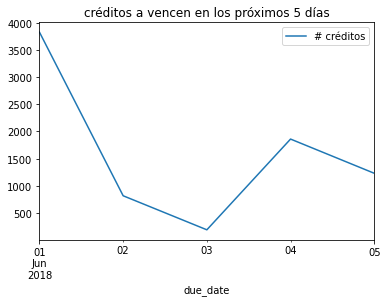

In [206]:
by_date =  credit.groupby('due_date').count()
by_date =  by_date.reset_index()
by_date.plot(x='due_date',y='loan_id' ,kind='line',
             label='# créditos',
             title='créditos a vencen en los próximos 5 días')

In [202]:
credit.groupby('due_date').count()


,loan_id,status,paid_date,loan_amount,risk_score,gender,age,dependants,device,urban_city,loan_usage,DiasVencido
due_date,,,,,,,,,,,,
2018-06-01,3829,3829,3308,3829,3829,3829,3829,3829,3829,3829,3829,3308
2018-06-02,816,816,661,816,816,816,816,816,816,816,816,661
2018-06-03,189,189,134,189,189,189,189,189,189,189,189,134
2018-06-04,1860,1860,1590,1860,1860,1860,1860,1860,1860,1860,1860,1590
2018-06-05,1230,1230,1033,1230,1230,1230,1230,1230,1230,1230,1230,1033
